In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mysql.connector

# Customer data

In [3]:
data1 = pd.read_csv("customer_data.csv", encoding = "ISO-8859-1")

In [4]:
data1.shape

(15266, 10)

In [5]:
data1.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [10]:
data1.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [12]:
Customdata_1= data1.copy()

In [14]:
Customdata_1

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [16]:
Customdata_1.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [18]:
Customdata_1.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [20]:
Customdata_1['State Code'].fillna("Nap", inplace = True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\4211361955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Customdata_1['State Code'].fillna("Nap", inplace = True)


In [22]:
Customdata_1

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [24]:
Customdata_1['Birthday']=pd.to_datetime(Customdata_1['Birthday'],format='%m/%d/%Y',errors ='coerce').dt.date # format into month /day/year format

In [26]:
Customdata_1

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [28]:
# creating column age
today = datetime.today()
Customdata_1["Age"] =Customdata_1["Birthday"].apply(
    lambda x:today.year - x.year-((today.month,today.day)<(x.month,x.day)))

In [30]:
Customdata_1.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58


In [32]:
Customdata_1.describe()

,CustomerKey,Age
count,1.526600e+04,15266.000000
mean,1.060508e+06,55.481331
std,6.127097e+05,19.321917
min,3.010000e+02,22.000000
25%,5.140335e+05,39.000000
50%,1.079244e+06,56.000000
75%,1.593980e+06,72.000000
max,2.099937e+06,89.000000


In [34]:
Customdata_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15266 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
 10  Age          15266 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [36]:
data_group=Customdata_1[["CustomerKey","Country"]].groupby(["Country"]).count()

In [38]:
data_group

,CustomerKey
Country,
Australia,1420
Canada,1553
France,670
Germany,1473
Italy,645
Netherlands,733
United Kingdom,1944
United States,6828


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\847302579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_group,x ="Country",y="CustomerKey", palette='summer')


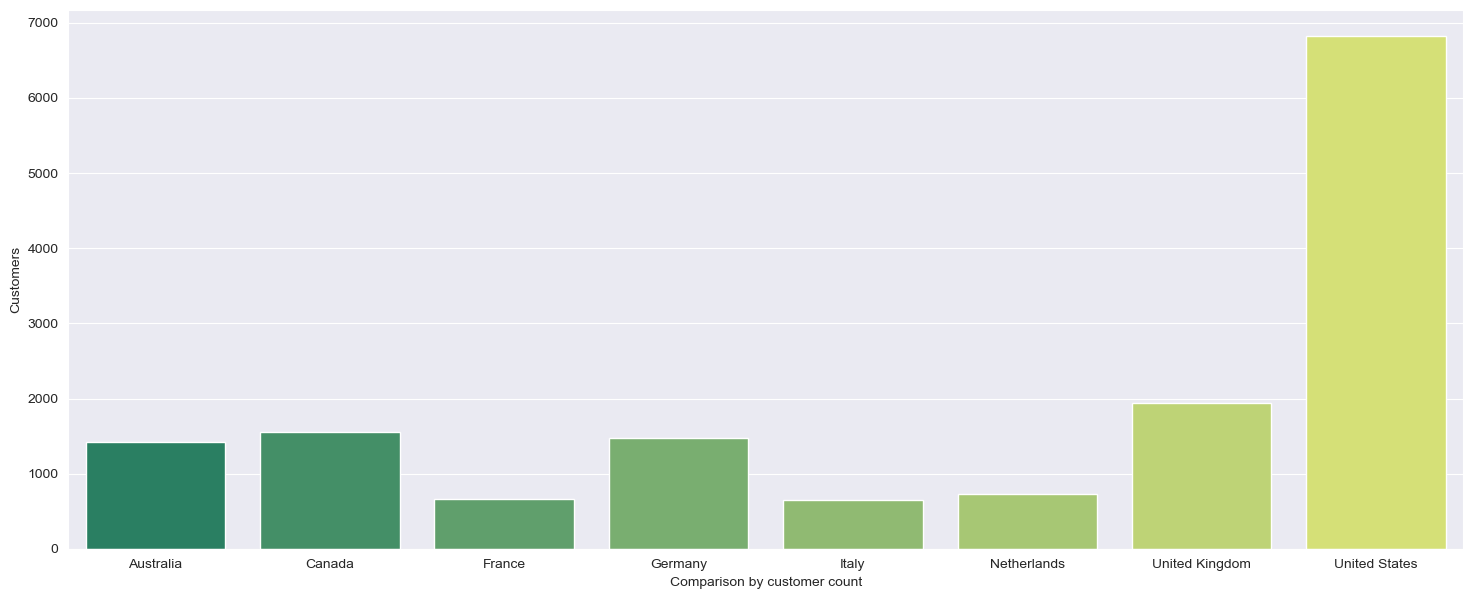

In [40]:
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.barplot(data=data_group,x ="Country",y="CustomerKey", palette='summer')
plt.ylabel("Customers")
plt.xlabel("Comparison by customer count")
plt.show()

In [42]:
def Age_Group(age):
    if age <=18:
        return "Teenage"
    elif age >=19 and age<= 35:
        return "adult"
    elif age >= 36 and age <=60:
        return "Middle-Age"
    else:
        return "Senior citizen"



In [44]:
Customdata_1["AgeGroup"]= Customdata_1["Age"].apply(Age_Group)

In [46]:
Customdata_1.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,AgeGroup
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85,Senior citizen
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44,Middle-Age
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77,Senior citizen
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,66,Senior citizen
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58,Middle-Age


In [48]:
Customdata_1['Country'].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

In [50]:
data_group=Customdata_1[["AgeGroup","Country","Age"]].groupby(["Country","AgeGroup"]).count() # Barplot based on agegroup

In [52]:
data_group

Age
Country        AgeGroup            
Australia      Middle-Age       547
               Senior citizen   608
               adult            265
Canada         Middle-Age       576
               Senior citizen   667
               adult            310
France         Middle-Age       237
               Senior citizen   306
               adult            127
Germany        Middle-Age       577
               Senior citizen   619
               adult            277
Italy          Middle-Age       247
               Senior citizen   264
               adult            134
Netherlands    Middle-Age       272
               Senior citizen   319
               adult            142
United Kingdom Middle-Age       698
               Senior citizen   830
               adult            416
United States  Middle-Age      2538
               Senior citizen  2893
               adult           1397

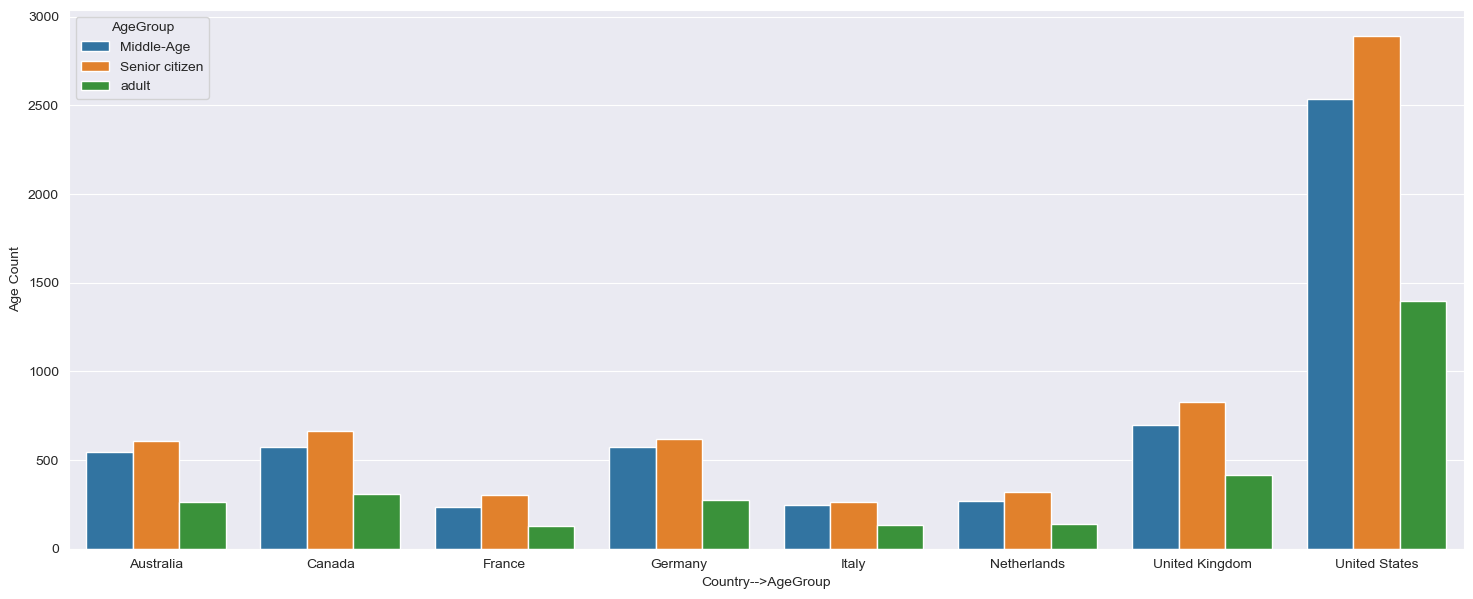

In [54]:
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.barplot(data=data_group,x="Country",y="Age",hue="AgeGroup")
plt.ylabel("Age Count")
plt.xlabel("Country-->AgeGroup")
plt.show()

In [55]:
data_group=Customdata_1[["AgeGroup","Country","Gender"]].groupby(["Country","Gender"]).count() # Based on gender

In [58]:
data_group

AgeGroup
Country        Gender          
Australia      Female       721
               Male         699
Canada         Female       755
               Male         798
France         Female       351
               Male         319
Germany        Female       734
               Male         739
Italy          Female       319
               Male         326
Netherlands    Female       345
               Male         388
United Kingdom Female       938
               Male        1006
United States  Female      3355
               Male        3473

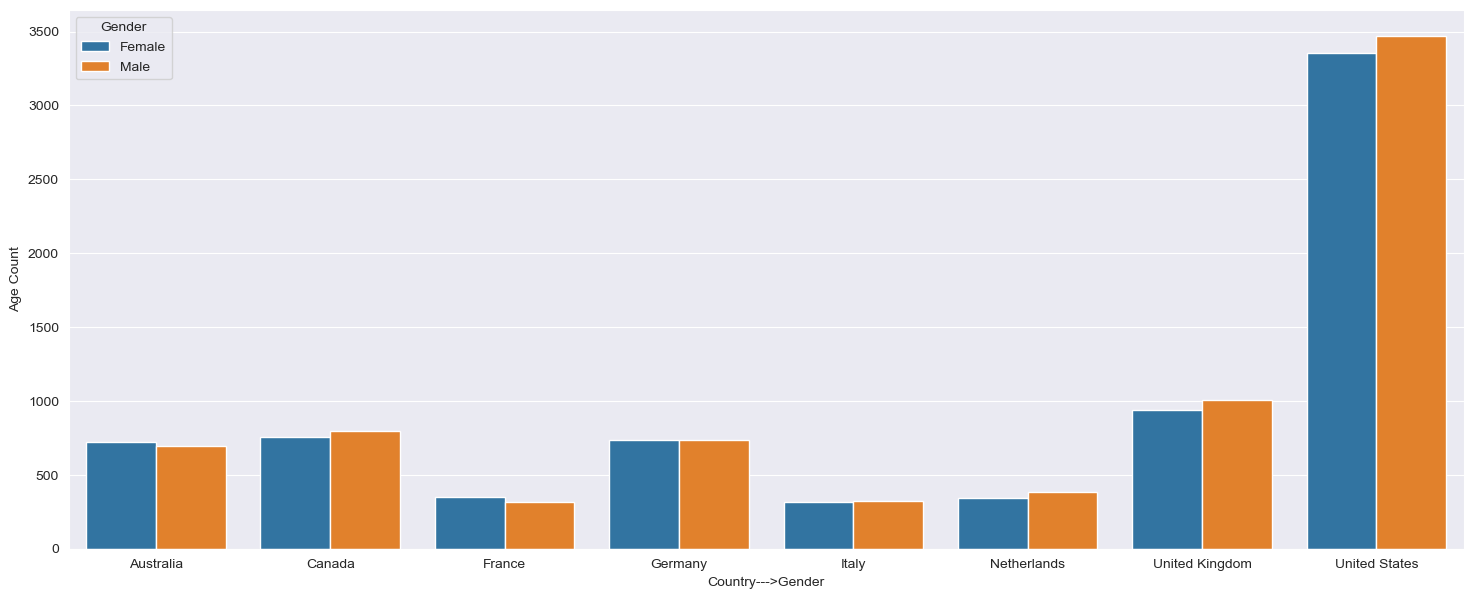

In [60]:
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.barplot(data=data_group, x="Country", y ="AgeGroup", hue = "Gender")
plt.ylabel("Age Count")
plt.xlabel("Country--->Gender")
plt.show()

# Sales data

In [63]:
data2 = pd.read_csv("Sales_data.csv")

In [65]:
data2

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [67]:
sales_data1 = data2.copy()

In [69]:
sales_data1

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [71]:
sales_data1.shape

(62884, 9)

In [73]:
sales_data1.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [75]:
(sales_data1.isnull().sum()/(len(sales_data1)))*100

Order Number      0.000000
Line Item         0.000000
Order Date        0.000000
Delivery Date    79.064627
CustomerKey       0.000000
StoreKey          0.000000
ProductKey        0.000000
Quantity          0.000000
Currency Code     0.000000
dtype: float64

In [77]:
sales_data1.dtypes

Order Number      int64
Line Item         int64
Order Date       object
Delivery Date    object
CustomerKey       int64
StoreKey          int64
ProductKey        int64
Quantity          int64
Currency Code    object
dtype: object

In [368]:
sales_data1['Order Date	']=pd.to_datetime(sales_data1['Order Date'],format='%m/%d/%Y',errors = "coerce").dt.date  # date format

In [370]:
sales_data1['Delivery Date']=pd.to_datetime(sales_data1['Delivery Date'],format ='%m/%d/%Y', errors = "coerce").dt.date # date format

In [372]:
sales_data1['Delivery Date'].fillna("No Date", inplace = True) # fill Na with No date

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\589720731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data1['Delivery Date'].fillna("No Date", inplace = True) # fill Na with No date


In [ ]:
sales_data1=Total_sales.drop(['Order Date\t'], axis=1)

In [380]:
Total_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,No Date,265598,10,1304,1,CAD
1,366001,1,1/1/2016,2016-01-13,1269051,0,1048,2,USD
2,366001,2,1/1/2016,2016-01-13,1269051,0,2007,1,USD
3,366002,1,1/1/2016,2016-01-12,266019,0,1106,7,CAD
4,366002,2,1/1/2016,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,No Date,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2021-02-23,331277,0,1717,2,CAD


In [89]:
sales_data1.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
Order Date\t     0
dtype: int64

In [341]:
Total_sales=sales_data1

In [378]:
Total_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,No Date,265598,10,1304,1,CAD
1,366001,1,1/1/2016,2016-01-13,1269051,0,1048,2,USD
2,366001,2,1/1/2016,2016-01-13,1269051,0,2007,1,USD
3,366002,1,1/1/2016,2016-01-12,266019,0,1106,7,CAD
4,366002,2,1/1/2016,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,No Date,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2021-02-23,331277,0,1717,2,CAD


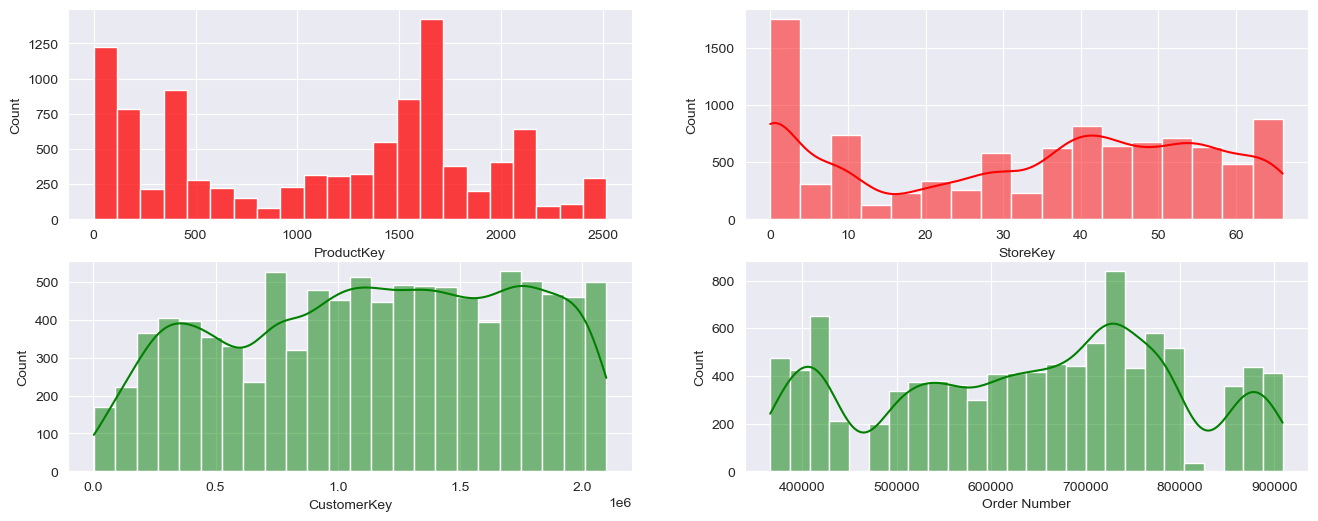

In [95]:
fig, axes = plt.subplots(2,2, figsize = (16,6))


sns.histplot(data = Total_sales, x = 'ProductKey', color= "red", ax= axes[0,0])
sns.histplot(data = Total_sales, x = 'StoreKey', color= "r", ax= axes[0,1], kde = True)
sns.histplot(data = Total_sales, x = 'CustomerKey', color= "green", ax= axes[1,0], kde = True)
sns.histplot(data = Total_sales, x = 'Order Number', color= "green", ax= axes[1,1], kde = True)



plt.show()



# stores data

In [97]:
data3 = pd.read_csv("Stores_data.csv")

In [100]:
data3

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [102]:
Stores_data1=data3.copy()

In [104]:
Stores_data1

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [106]:
Stores_data1.shape

(67, 5)

In [108]:
Stores_data1.dtypes

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object

In [110]:
Stores_data1.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [112]:
Stores_data1['Square Meters'].fillna("0", inplace = True) # fill Na with No date

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\2397548310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Stores_data1['Square Meters'].fillna("0", inplace = True) # fill Na with No date
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\2397548310.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Stores_data1['Square Meters'].fillna("0"

In [114]:
Stores_data1

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [116]:
Stores_data1['Open Date']=pd.to_datetime(Stores_data1['Open Date']).dt.strftime('%m/%d/%Y') # format into month /day/year format

In [118]:
Stores_data1.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [120]:
Stores_data1

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,01/01/2008
1,2,Australia,Northern Territory,665.0,01/12/2008
2,3,Australia,South Australia,2000.0,01/07/2012
3,4,Australia,Tasmania,2000.0,01/01/2010
4,5,Australia,Victoria,2000.0,12/09/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,03/06/2008
63,64,United States,Washington DC,1330.0,01/01/2010
64,65,United States,West Virginia,1785.0,01/01/2012
65,66,United States,Wyoming,840.0,01/01/2014


# Product and sales Merge

In [123]:
data4 = pd.read_csv("Products_data.csv")

In [125]:
Product_data1=data4.copy()

In [127]:
Product_data1

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [129]:
Product_data1.shape

(2517, 10)

In [131]:
Product_data1.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [133]:
Product_data1.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [135]:
Product_data1["Unit Cost USD"] = Product_data1["Unit Cost USD"].str.replace("$", "").str.replace(",","")
Product_data1["Unit Price USD"] = Product_data1["Unit Price USD"].str.replace("$", "").str.replace(",","")


In [137]:
Product_data1["Unit Cost USD"]=Product_data1["Unit Cost USD"].astype(float)
Product_data1["Unit Price USD"]=Product_data1["Unit Price USD"].astype(float)

In [139]:
Product_data1

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [141]:
import plotly.graph_objects as go
import  plotly.express as px

In [142]:
Pd_salesdata=pd.merge( Product_data1,sales_data1, on='ProductKey', how = 'inner') # product and sales merge data

In [143]:
Pd_salesdata.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
StoreKey          0
Quantity          0
Currency Code     0
Order Date\t      0
dtype: int64

In [147]:
Pd_salesdata.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,Quantity,Currency Code,Order Date\t
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,493001,3,5/7/2016,2016-05-14,453993,0,1,EUR,2016-05-07
1,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,728016,1,12/28/2016,No Date,1513119,47,1,USD,2016-12-28
2,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,891001,1,6/9/2017,2017-06-13,741381,0,1,EUR,2017-06-09
3,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,1025004,4,10/21/2017,No Date,2028962,56,8,USD,2017-10-21
4,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,1053003,3,11/18/2017,No Date,1579183,50,3,USD,2017-11-18


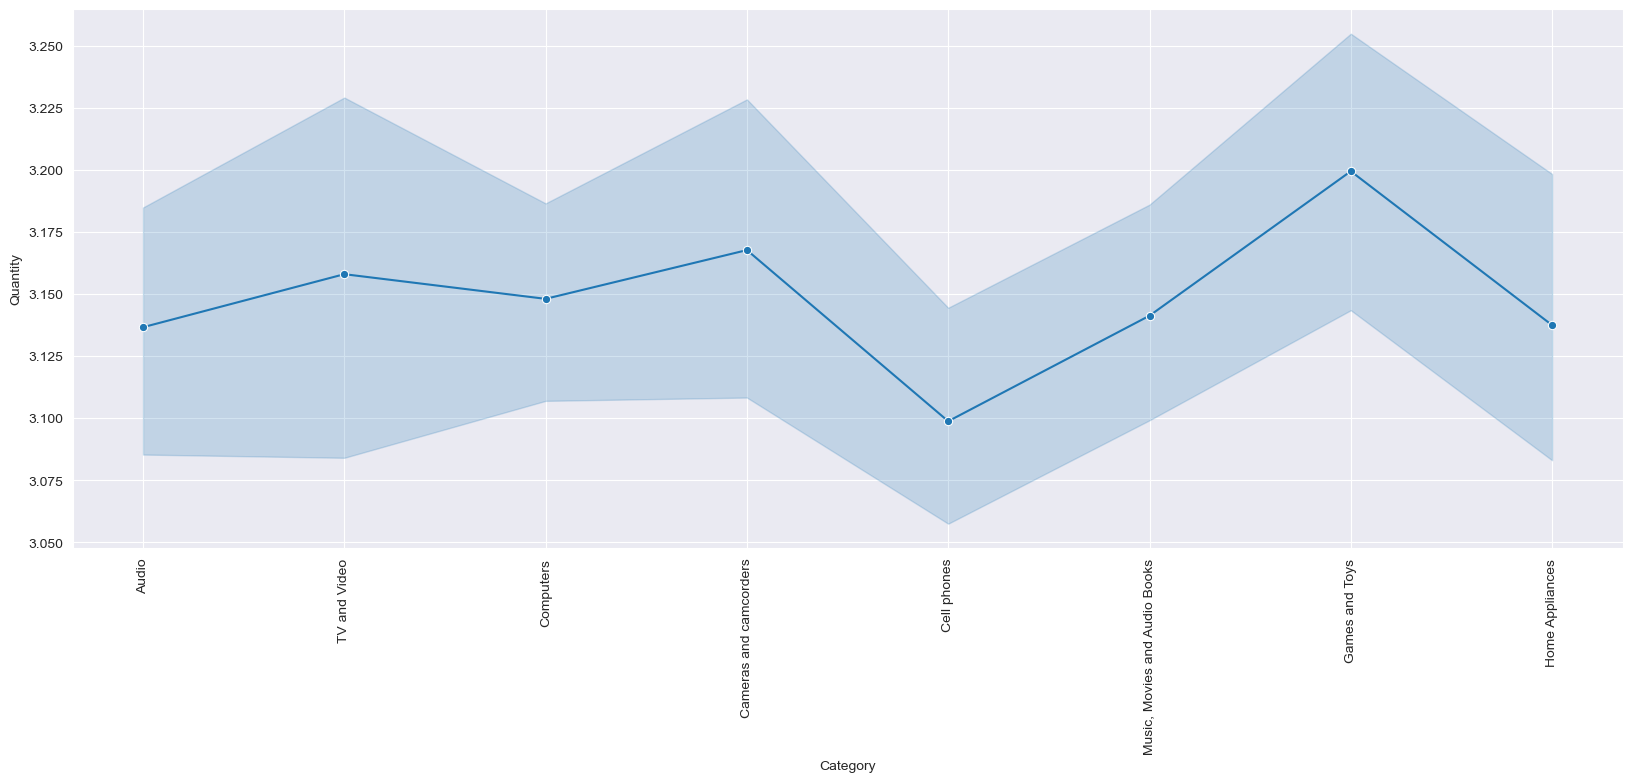

In [149]:
plt.figure(figsize=(20,7))
sns.lineplot(data=Pd_salesdata,x="Category",y="Quantity",marker="o")
plt.xticks(rotation=90)
plt.show()

In [150]:
sub_category=Pd_salesdata[["Subcategory","SubcategoryKey"]]

In [151]:
sub_details_1=sub_category.drop_duplicates().reset_index()

In [152]:
sub_details_1

,index,Subcategory,SubcategoryKey
0,0,MP4&MP3,101
1,1052,Recording Pen,104
2,3162,Bluetooth Headphones,106
3,7489,Televisions,201
4,9284,VCD & DVD,202
5,10182,Home Theater System,203
6,10614,Car Video,205
7,11047,Laptops,301
8,12647,Desktops,303
9,19094,Monitors,304


In [157]:
sub_details_1.drop(["index"],axis=1,inplace=True)

In [159]:
sub_details_1

,Subcategory,SubcategoryKey
0,MP4&MP3,101
1,Recording Pen,104
2,Bluetooth Headphones,106
3,Televisions,201
4,VCD & DVD,202
5,Home Theater System,203
6,Car Video,205
7,Laptops,301
8,Desktops,303
9,Monitors,304


In [161]:
sub_details_2=Pd_salesdata.groupby('Subcategory').size().reset_index(name="subCategory_Count")

In [163]:
sub_details_2

,Subcategory,subCategory_Count
0,Air Conditioners,312
1,Bluetooth Headphones,4327
2,Boxed Games,3455
3,Camcorders,1403
4,Cameras & Camcorders Accessories,1423
5,Car Video,433
6,Cell phones Accessories,1713
7,Coffee Machines,724
8,Computers Accessories,1526
9,Desktops,6447


In [165]:
merge_sub_details=pd.merge(sub_details_1,sub_details_2,on ="Subcategory", how="inner")

In [167]:
merge_sub_details

,Subcategory,SubcategoryKey,subCategory_Count
0,MP4&MP3,101,1052
1,Recording Pen,104,2110
2,Bluetooth Headphones,106,4327
3,Televisions,201,1795
4,VCD & DVD,202,898
5,Home Theater System,203,432
6,Car Video,205,433
7,Laptops,301,1600
8,Desktops,303,6447
9,Monitors,304,1480


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\4122430904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merge_sub_details,x="Subcategory",y="subCategory_Count",palette=np.array(pal)[rank])
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12036\4122430904.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=merge_sub_details,x="Subcategory",y="subCategory_Count",palette=np.array(pal)[rank])


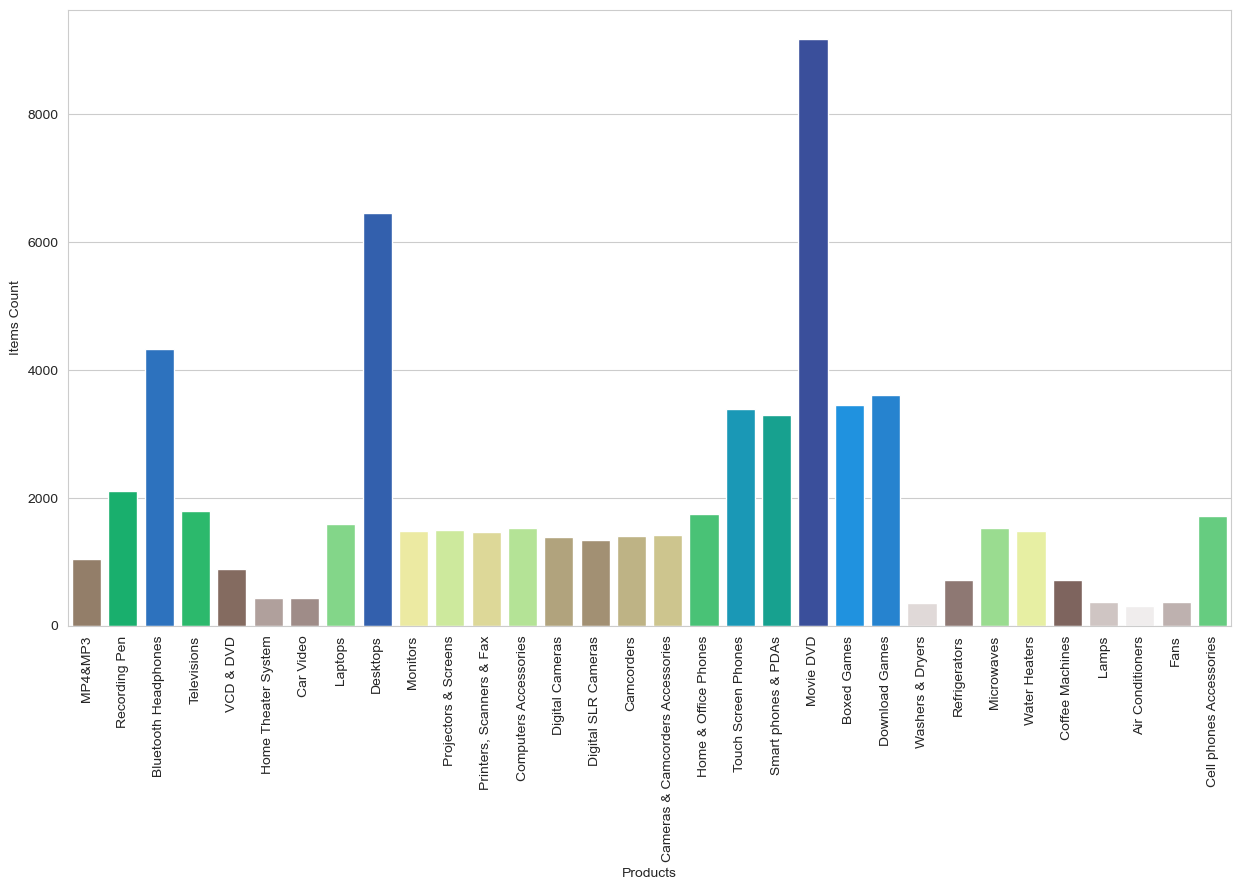

In [169]:
#barplot for sub_category items

plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
plt.xticks(rotation=90)
pal = sns.color_palette(palette='terrain_r', n_colors=len(merge_sub_details))
norm = merge_sub_details['subCategory_Count'] / merge_sub_details['subCategory_Count'].max()
rank = norm.argsort().argsort()
sns.barplot(data=merge_sub_details,x="Subcategory",y="subCategory_Count",palette=np.array(pal)[rank])
plt.xlabel("Products")
plt.ylabel("Items Count")
plt.show()


In [170]:
sub_categories1=Pd_salesdata.groupby(['Brand','Category','Subcategory']).size().reset_index(name="Subcategory_Count") # Brandwise 

In [177]:
category=sub_categories1.groupby(["Brand","Category","Subcategory","Subcategory_Count"]).count()

In [179]:
category

Empty DataFrame
Columns: []
Index: [(A. Datum, Cameras and camcorders, Digital Cameras, 1396), (A. Datum, Cameras and camcorders, Digital SLR Cameras, 438), (Adventure Works, Computers, Desktops, 3177), (Adventure Works, Computers, Laptops, 573), (Adventure Works, Computers, Monitors, 517), (Adventure Works, Home Appliances, Coffee Machines, 231), (Adventure Works, Home Appliances, Lamps, 89), (Adventure Works, TV and Video, Televisions, 1795), (Contoso, Audio, MP4&MP3, 1052), (Contoso, Cameras and camcorders, Cameras & Camcorders Accessories, 1423), (Contoso, Cameras and camcorders, Digital SLR Cameras, 414), (Contoso, Cell phones, Cell phones Accessories, 1713), (Contoso, Cell phones, Home & Office Phones, 1752), (Contoso, Cell phones, Touch Screen Phones, 631), (Contoso, Computers, Computers Accessories, 1122), (Contoso, Computers, Projectors & Screens, 520), (Contoso, Home Appliances, Air Conditioners, 180), (Contoso, Home Appliances, Coffee Machines, 233), (Contoso, Home Appliances, Microwaves, 437), (Contoso, Home Appliances, Washers & Dryers, 140), (Contoso, Home Appliances, Water Heaters, 1485), (Contoso, Music, Movies and Audio Books, Movie DVD, 4621), (Contoso, TV and Video, Home Theater System, 230), (Fabrikam, Cameras and camcorders, Camcorders, 1403), (Fabrikam, Cameras and camcorders, Digital SLR Cameras, 485), (Fabrikam, Computers, Laptops, 491), (Fabrikam, Home Appliances, Coffee Machines, 260), (Fabrikam, Home Appliances, Microwaves, 559), (Fabrikam, Home Appliances, Refrigerators, 362), (Litware, Home Appliances, Fans, 375), (Litware, Home Appliances, Lamps, 81), (Litware, Home Appliances, Microwaves, 532), (Litware, Home Appliances, Refrigerators, 357), (Litware, Home Appliances, Washers & Dryers, 116), (Litware, TV and Video, Home Theater System, 202), (Northwind Traders, Audio, Bluetooth Headphones, 2315), (Northwind Traders, Home Appliances, Washers & Dryers, 96), (Proseware, Computers, Laptops, 244), (Proseware, Computers, Monitors, 536), (Proseware, Computers, Printers, Scanners & Fax, 1467), (Proseware, Computers, Projectors & Screens, 521), (Proseware, Home Appliances, Air Conditioners, 132), (Proseware, Home Appliances, Lamps, 95), (Southridge Video, Computers, Computers Accessories, 404), (Southridge Video, Games and Toys, Boxed Games, 1604), (Southridge Video, Music, Movies and Audio Books, Movie DVD, 4548), (Southridge Video, TV and Video, Car Video, 433), (Southridge Video, TV and Video, VCD & DVD, 898), (Tailspin Toys, Games and Toys, Boxed Games, 1851), (Tailspin Toys, Games and Toys, Download Games, 3606), (The Phone Company, Cell phones, Smart phones & PDAs, 3302), (The Phone Company, Cell phones, Touch Screen Phones, 2760), (Wide World Importers, Audio, Bluetooth Headphones, 2012), (Wide World Importers, Audio, Recording Pen, 2110), (Wide World Importers, Computers, Desktops, 3270), (Wide World Importers, Computers, Laptops, 292), (Wide World Importers, Computers, Monitors, 427), (Wide World Importers, Computers, Projectors & Screens, 464), (Wide World Importers, Home Appliances, Lamps, 105)]

In [181]:
data5 = pd.read_csv("Exchange_Rates data.csv")

In [183]:
Exchange_data=data5.copy()

In [185]:
Exchange_data

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [187]:
Exchange_data.dtypes

Date         object
Currency     object
Exchange    float64
dtype: object

In [189]:
Exchange_data.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [191]:
# Product_data1 ;   Customdata_1 ;  Total_sales;   Exchange_data;   Stores_data1;

# SQL database

In [200]:
conn=mysql.connector.connect(
    host="localhost", 
    user="root", 
    password="root",
)
    
my_cursor = conn.cursor()

In [202]:
my_cursor.execute("CREATE DATABASE IF NOT EXISTS DatasparkGB")

In [204]:
conn.database = 'DatasparkGB'

In [206]:
# Create table for Customers

In [252]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_records(
                  CustomerKey INT PRIMARY KEY,
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State_Code VARCHAR(255),
                  State VARCHAR(255),
                  Zip_Code VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday VARCHAR(255),
                  Age INT,
                  AgeGroup VARCHAR(255)
                  
                  )''')
print("Table created successfully")

Table created successfully


In [254]:
# Insert customer records

In [256]:
insert_values='''INSERT INTO Customer_records(
                  CustomerKey,
                  Gender,
                  Name,
                  City,
                  State_Code,
                  State,
                  Zip_Code,
                  Country,
                  Continent,
                  Birthday,
                  Age,
                  AgeGroup)
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

In [258]:
for index, row in Customdata_1.iterrows():
    my_cursor.execute(insert_values, (
            row['CustomerKey'],
            row['Gender'],
            row['Name'],
            row['City'],
            row['State Code'],
            row['State'],
            row['Zip Code'],
            row['Country'],
            row['Continent'],
            row['Birthday'],
            row['Age'],
            row['AgeGroup']
        ))
    
conn.commit()


            

In [ ]:
# Create table product 

In [260]:
 
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_records(
                  ProductKey INT PRIMARY KEY,
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD FLOAT,
                  Unit_Price_USD FLOAT,
                  SubcategoryKey INT,
                  Subcategory VARCHAR(255),
                  CategoryKey INT,
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [262]:
# insert value to product

In [315]:
insert_values ='''INSERT INTO product_records(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  SubcategoryKey,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

In [317]:
for index, row in Product_data1.iterrows():
    my_cursor.execute(insert_values, (
        row['ProductKey'],
        row['Product Name'],
        row['Brand'],
        row['Color'],
        row['Unit Cost USD'],
        row['Unit Price USD'],
        row['SubcategoryKey'],
        row['Subcategory'],
        row['CategoryKey'],
        row['Category']
    ))
    
    conn.commit()

In [ ]:
# Create table for sales

In [298]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_records(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date VARCHAR(255),
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  FOREIGN KEY (CustomerKey) References customer_records (Customerkey),
                  StoreKey INT,
                  ProductKey INT,
                  FOREIGN KEY (ProductKey) References product_records (ProductKey),
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')
print("Table created successfully")

Table created successfully


In [388]:
insert_values ='''INSERT INTO sales_records(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''

In [390]:
for index, row in Total_sales.iterrows():
    my_cursor.execute(insert_values, (
        row['Order Number'],
        row['Line Item'],
        row['Order Date'],
        row['Delivery Date'],           
        row['CustomerKey'],
        row['StoreKey'],
        row['ProductKey'],
        row['Quantity'],
        row['Currency Code']
    
    ))
    
    conn.commit()
print("successful")

successful


In [ ]:
# CReate Store record

In [392]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS stores_records(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date VARCHAR(255)
                  )''')
print("successfully")

successfully


In [395]:
insert_values ='''INSERT INTO stores_records(
                  StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''


In [398]:
for index,row in Stores_data1.iterrows():
    my_cursor.execute(insert_values,((row['StoreKey'],
                           row['Country'],
                           row['State'],
                           row['Square Meters'],
                           row['Open Date']
                           ))
                    )
conn.commit()
print("successful")             

successful


In [401]:
# Create for exchange

In [403]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_records(
                  Date VARCHAR(255),
                  CurrencyCode VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [405]:
# insert values exchange rate

In [407]:
insert_values ='''INSERT INTO exchange_records(
                  Date,
                 CurrencyCode,
                  Exchange)
                  VALUES (%s, %s, %s)'''

In [411]:
for index,row in Exchange_data.iterrows():
    my_cursor.execute(insert_values,((row['Date'],
                           row['Currency'],
                           row['Exchange'],
                           ))
                    )
conn.commit()
print("successfully")

successfully
